In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:

pd.set_option('display.max_rows', None)  # Î™®Îì† Ìñâ Ï∂úÎ†•
pd.set_option('display.max_columns', None)  # Î™®Îì† Ïó¥ Ï∂úÎ†•
pd.set_option('display.width', None)  # Í∞ÄÎ°ú ÎÑàÎπÑ ÏûêÎèô Ï°∞Ï†ï
pd.set_option('display.max_colwidth', None)  # Í∏¥ Î¨∏ÏûêÏó¥ÎèÑ Î™®Îëê ÌëúÏãú



nullÍ∞í Ï≤òÎ¶¨

In [3]:

# 1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú
file_path = "new_fall_data_3sec.csv"
df = pd.read_csv(file_path)

# 2. ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù
categorical_columns = ['subject', 'status', 'interval', 'fall_stage']
numerical_columns = ['ax_kurtosis' , 'ax_time_energy', 'ax_activity_count', 
                      'ay_kurtosis',  'ay_time_energy', 'ay_activity_count',
                      'az_kurtosis','az_time_energy', 'az_activity_count']

# 3. subjectÎ≥Ñ, statusÎ≥Ñ, fall_stageÎ≥Ñ ÌèâÍ∑† Í∞íÏúºÎ°ú NaN ÎåÄÏ≤¥
df[numerical_columns] = df.groupby(['subject', 'status', 'fall_stage'])[numerical_columns].transform(lambda x: x.fillna(x.mean()))

# 4. 'NaN' Î¨∏ÏûêÏó¥, Îπà Î¨∏ÏûêÏó¥, inf Í∞í Ï≤òÎ¶¨
df[numerical_columns] = df[numerical_columns].replace(["NaN", "", " ", "nan", np.inf, -np.inf], np.nan)

# 5. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Î™®Îì† Í∞íÏùÑ floatÎ°ú Î≥ÄÌôò)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# 6. NaN Í∞íÏù¥ ÏûàÏúºÎ©¥ 0ÏúºÎ°ú ÎåÄÏ≤¥
df[numerical_columns] = df[numerical_columns].fillna(0)

# 7. Í∑∏ÎûòÎèÑ NaNÏù¥ ÏûàÏúºÎ©¥ Ìï¥Îãπ Ìñâ ÏÇ≠Ï†ú
df = df.dropna(subset=numerical_columns, how='any')



# SMOTEÏ†ÅÏö©ÌïòÏó¨ oversampling

Epoch 1/50


c:\Users\angel\anaconda3\envs\opencv312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 20ms/step - accuracy: 0.4432 - loss: 0.9982 - val_accuracy: 0.3984 - val_loss: 1.0371 - learning_rate: 3.0000e-04
Epoch 2/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.5458 - loss: 0.8827 - val_accuracy: 0.4922 - val_loss: 0.9997 - learning_rate: 3.0000e-04
Epoch 3/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.5522 - loss: 0.8470 - val_accuracy: 0.4141 - val_loss: 0.9788 - learning_rate: 3.0000e-04
Epoch 4/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.5819 - loss: 0.8237 - val_accuracy: 0.4297 - val_loss: 0.9601 - learning_rate: 3.0000e-04
Epoch 5/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 10ms/step - accuracy: 0.5527 - loss: 0.8553 - val_accuracy: 0.4453 - val_loss: 0.9503 - learning_rate: 3.0000e-04
Epoch 6/50
51/51 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

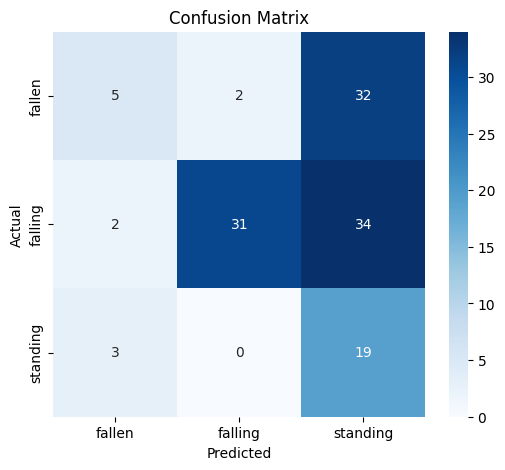

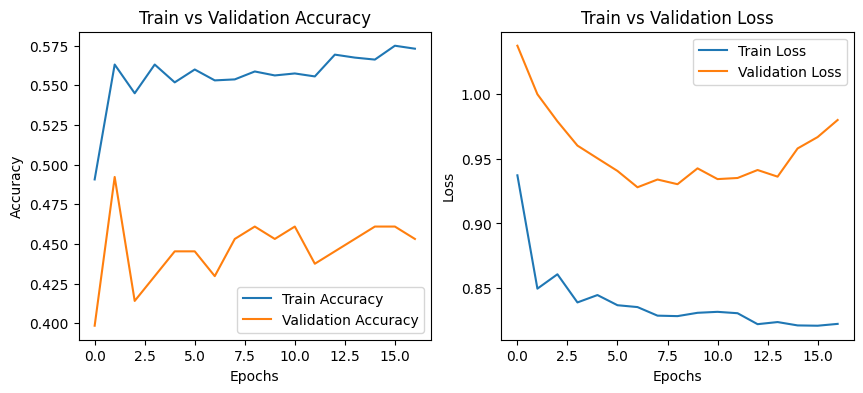

‚úÖ Ï†ïÌôïÎèÑ(Accuracy): 0.4297
‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): 0.4848

üîç Classification Report:
               precision    recall  f1-score   support

      fallen       0.50      0.13      0.20        39
     falling       0.94      0.46      0.62        67
    standing       0.22      0.86      0.36        22

    accuracy                           0.43       128
   macro avg       0.55      0.48      0.39       128
weighted avg       0.68      0.43      0.45       128



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, BatchNormalization, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

# ‚úÖ ÏãúÍ∞Ñ ÏàúÏÑú Î≥¥Ï†ï: time_index Ï∂îÍ∞Ä
def add_time_index(df):
    df['time_index'] = df.groupby(['subject', 'status']).cumcount() / df.groupby(['subject', 'status']).transform('count')['interval']
    return df

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv("new_fall_data_3sec_clustered_time_adjusted.csv")
df = add_time_index(df)  # ÏãúÍ∞Ñ ÏàúÏÑú Ï†ïÎ≥¥ Ï∂îÍ∞Ä

# ‚úÖ ÌïôÏäµ Ï†ÑÏóê `fall_stage`Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Ï∂úÎ†•
print("\nüîç ÌïôÏäµ Ï†Ñ `fall_stage`Î≥Ñ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò:")
stage_counts = df['fall_stage'].value_counts()
print(stage_counts)

# ‚úÖ Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî (bar chart)
plt.figure(figsize=(6, 4))
sns.barplot(x=stage_counts.index, y=stage_counts.values, palette='viridis')
plt.xlabel("Fall Stage")
plt.ylabel("Count")
plt.title("Class Distribution Before Training")
plt.show()

# ‚úÖ ÌïôÏäµÏóê ÌïÑÏöîÌïú Ïª¨Îüº ÏÑ†ÌÉù
categorical_columns = ['subject', 'status', 'interval']
numerical_columns = ['ax_spectral_entropy', 'ax_time_energy', 'ax_activity_count', 
                      'ay_kurtosis', 'ay_spectral_entropy', 'ay_time_energy', 'ay_activity_count',
                      'az_kurtosis', 'az_spectral_entropy', 'time_index']  # ‚¨Ö time_index Ï∂îÍ∞Ä

df_numerical = df[numerical_columns]

# 3. subjectÎ≥Ñ, statusÎ≥Ñ, fall_stageÎ≥Ñ ÌèâÍ∑† Í∞íÏúºÎ°ú NaN ÎåÄÏ≤¥
df[numerical_columns] = df.groupby(['subject', 'status', 'fall_stage'])[numerical_columns].transform(lambda x: x.fillna(x.mean()))

# 4. 'NaN' Î¨∏ÏûêÏó¥, Îπà Î¨∏ÏûêÏó¥, inf Í∞í Ï≤òÎ¶¨
df[numerical_columns] = df[numerical_columns].replace(["NaN", "", " ", "nan", np.inf, -np.inf], np.nan)

# 5. Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ Î≥ÄÌôò (Î™®Îì† Í∞íÏùÑ floatÎ°ú Î≥ÄÌôò)
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# 6. NaN Í∞íÏù¥ ÏûàÏúºÎ©¥ 0ÏúºÎ°ú ÎåÄÏ≤¥
df[numerical_columns] = df[numerical_columns].fillna(0)

# 7. Í∑∏ÎûòÎèÑ NaNÏù¥ ÏûàÏúºÎ©¥ Ìï¥Îãπ Ìñâ ÏÇ≠Ï†ú
df = df.dropna(subset=numerical_columns, how='any')



# ‚úÖ ÏàòÏπòÌòï Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî
scaler = StandardScaler()
df_numerical_scaled = pd.DataFrame(scaler.fit_transform(df_numerical), columns=df_numerical.columns)

# ‚úÖ `fall_stage` Î¨∏ÏûêÏó¥ÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò (Label Encoding)
label_encoder = LabelEncoder()
df['fall_stage'] = label_encoder.fit_transform(df['fall_stage'].astype(str))

# ‚úÖ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
X = df_numerical_scaled.values
y = df['fall_stage'].values

# ‚úÖ Train/Test Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# ‚úÖ Oversampling (SMOTE Ï†ÅÏö©)
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ‚úÖ Îç∞Ïù¥ÌÑ∞ Ï¶ùÍ∞ï Ï†ÅÏö©
def augment_timeseries_data(X, y):
    noise_factor = 0.05
    X_noisy = X + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X.shape)
    return np.vstack([X, X_noisy]), np.hstack([y, y])

X_train_resampled, y_train_resampled = augment_timeseries_data(X_train_resampled, y_train_resampled)

# ‚úÖ Conv1D ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú Î≥ÄÌôò
X_train_resampled = X_train_resampled.reshape(-1, X_train_resampled.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# ‚úÖ One-Hot Encoding
y_train_resampled_categorical = to_categorical(y_train_resampled)
y_test_categorical = to_categorical(y_test)

# ‚úÖ CNN+LSTM Î™®Îç∏ ÏàòÏ†ï (ÏãúÍ∞Ñ ÏàúÏÑú Î≥¥Ï†ï Ï∂îÍ∞Ä)
model = Sequential([
    Conv1D(filters=64, kernel_size=5, activation='relu', padding='same', input_shape=(X_train_resampled.shape[1], 1)), 
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(y_train_resampled_categorical.shape[1], activation='softmax')  
])

# ‚úÖ Adam with AMSGrad Ï†ÅÏö©
optimizer = Adam(learning_rate=0.0003, amsgrad=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ‚úÖ ÌïôÏäµÎ•† Í∞êÏÜå ÏΩúÎ∞±
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ‚úÖ ÌïôÏäµ Ïã§Ìñâ
history = model.fit(X_train_resampled, y_train_resampled_categorical, 
                    validation_data=(X_test, y_test_categorical),
                    epochs=50, batch_size=32, verbose=1, 
                    shuffle=True, callbacks=[early_stopping, lr_scheduler])

# ‚úÖ Î™®Îç∏ ÌèâÍ∞Ä
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# ‚úÖ Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# ‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall) Í≥ÑÏÇ∞
falling_recall = recall_score(y_true_classes, y_pred_classes, average='macro')

# ‚úÖ Confusion Matrix ÏãúÍ∞ÅÌôî
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ‚úÖ ÌïôÏäµ Î∞è Í≤ÄÏ¶ù Ï†ïÌôïÎèÑ & ÏÜêÏã§ Í∑∏ÎûòÌîÑ
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.show()

# ‚úÖ Í≤∞Í≥º Ï∂úÎ†•
print(f"‚úÖ Ï†ïÌôïÎèÑ(Accuracy): {accuracy:.4f}")
print(f"‚úÖ 'falling' ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú Ïû¨ÌòÑÏú®(Recall): {falling_recall:.4f}")
print("\nüîç Classification Report:\n", classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))
